# 13章例1

回归系数 β0: 98.40835294409078, β1: 0.9732467982858133
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     23.28
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           4.47e-05
Time:                        13:37:06   Log-Likelihood:                -125.71
No. Observations:                  30   AIC:                             255.4
Df Residuals:                      28   BIC:                             258.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

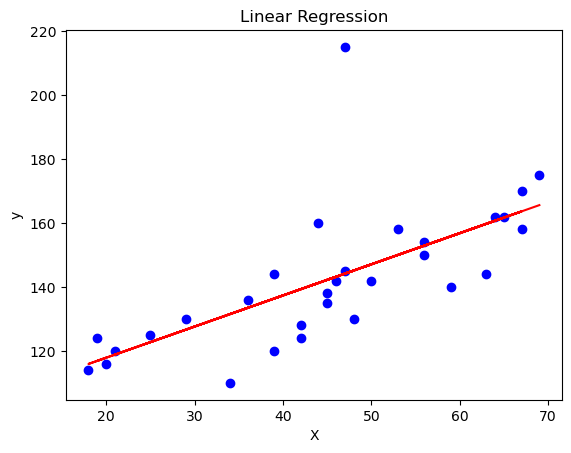

F: 23.283385369585204, p-value: 4.471638074121842e-05


In [13]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

# 示例数据
X = np.array([39,47,45,47,65,46,67,42,67,56,64,56,59,34,42,48,45,18,20,19,36,50,39,21,44,53,63,29,25,69]).reshape(-1, 1)  # 自变量
y = np.array([144,215,138,145,162,142,170,124,158,154,162,150,140,110,128,130,135,114,116,124,136,142,120,120,160,158,144,130,125,175])  # 因变量

# 线性回归模型
model = LinearRegression()
model.fit(X, y)

# 回归系数
beta_0 = model.intercept_
beta_1 = model.coef_[0]

print(f'回归系数 β0: {beta_0}, β1: {beta_1}')

# 添加常数项（截距）
X = sm.add_constant(X)

# 使用statsmodels计算置信区间和其他统计指标
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

# 置信区间
conf = ols_model.conf_int(alpha=0.05)
print(f'置信区间: \n beta_0: {conf[0]}, beta_1: {conf[1]}')

#perr
perr = ols_model.bse
print(f'perr: {perr}')

# 绘图
plt.scatter(X[:, 1], y, color='blue')
plt.plot(X[:, 1], model.predict(X[:, 1].reshape(-1, 1)), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

#计算F(1,n-2,1-alpha)
F = ols_model.fvalue
p_value = ols_model.f_pvalue
print(f'F: {F}, p-value: {p_value}')


# 多元线性回归

x的第一维是样本数,第二维是自变量个种类数

In [14]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 示例数据
X = np.array([
    [0.5601, 1.2, 3.3],
    [1.3864, 2.4, 4.5],
    [2.3, 3.6, 5.6],
    [3.7, 4.1, 6.7],
    [4.4, 5.8, 7.8],
    [5.2, 6.3, 8.0],
    [6.8, 7.4, 8.8],
    [7.1, 8.9, 9.1]
])

y = np.array([78.7484, 118.0683, 130.2, 145.6, 150.1, 160.2, 175.3, 180.5])

# 线性回归模型
model = LinearRegression()
model.fit(X, y)

# 回归系数
beta_0 = model.intercept_
beta_1 = model.coef_

print(f'回归系数 β0: {beta_0}, β1: {beta_1}')

# 添加常数项（截距）
X_const = sm.add_constant(X)

# 使用statsmodels计算置信区间和其他统计指标
ols_model = sm.OLS(y, X_const).fit()
print(ols_model.summary())

# 置信区间
conf = ols_model.conf_int(alpha=0.05)
print(f'置信区间: \n{conf}')

# 预测值
y_pred = model.predict(X)

# 绘图
plt.scatter(range(len(y)), y, color='blue', label='observed')
plt.plot(range(len(y)), y_pred, color='red', linestyle='--', label='predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()


回归系数 β0: 37.75379227765515, β1: [-0.29120085  0.22964326 15.55254223]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     28.80
Date:                Sun, 02 Jun 2024   Prob (F-statistic):            0.00362
Time:                        14:14:53   Log-Likelihood:                -26.365
No. Observations:                   8   AIC:                             60.73
Df Residuals:                       4   BIC:                             61.05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

/home/yux/codes/math-exam/mathematical_exp/.conda/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


# 多项式回归

拟合参数: a = 3.9999999999999973, b = 1.000000000000001, c = 2.0
参数标准误差: a = 1.955714836225392e-15, b = 1.2926139551128907e-15, c = 1.3541231536053022e-15
参数95%置信区间: a = [3.999999999999993, 4.000000000000002], b = [0.9999999999999981, 1.000000000000004], c = [1.999999999999997, 2.000000000000003]


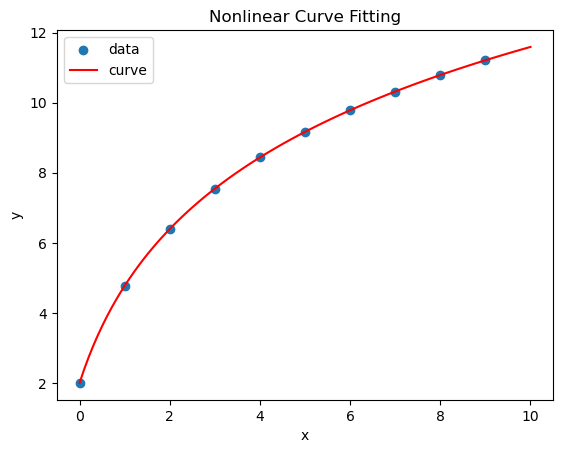

In [12]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.stats import t

# 示例数据
x = np.array([0, 1, 2, 3, 4, 5,6,7,8,9])
y= 4*np.log(x+1)+2



# 定义非线性函数，例如二次函数
def func(x, a, b, c):
    return a * np.log(b * x + 1) + c

# 进行曲线拟合
popt, pcov = curve_fit(func, x, y)

# 获取拟合参数及其置信区间
a, b, c = popt
perr = np.sqrt(np.diag(pcov))

# 计算95%置信区间
alpha = 0.05  # 95%的置信水平
n = len(y)    # 样本大小
dof = max(0, n - 2) # 自由度
tval = t.ppf(1 - alpha/2, dof)

ci_a = [a - tval * perr[0], a + tval * perr[0]]
ci_b = [b - tval * perr[1], b + tval * perr[1]]
ci_c = [c - tval * perr[2], c + tval * perr[2]]

print(f'拟合参数: a = {a}, b = {b}, c = {c}')
print(f'参数标准误差: a = {perr[0]}, b = {perr[1]}, c = {perr[2]}')
print(f'参数95%置信区间: a = {ci_a}, b = {ci_b}, c = {ci_c}')

# 绘制数据点和拟合曲线
plt.scatter(x, y, label='data')
x_fit = np.linspace(0, 10, 100)
y_fit = func(x_fit, *popt)
plt.plot(x_fit, y_fit, label='curve', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Nonlinear Curve Fitting')
plt.show()
